In [89]:
import pandas as pd
from pprint import pprint
from matplotlib import pyplot as plt
import numpy as np
data = pd.read_csv(r'C:\Users\Loveish Sarolia\Downloads\summer_internship_takehome.csv')

In [90]:
display(data.head(12))
print(data.shape[0])

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False
5,1,6,TX,50677036.26,9763597.30,26233794.37,365880,4452,False
6,1,7,TX,28215465.22,8245679.54,14457234.12,365880,4452,False
7,1,8,TX,38955413.84,7863853.69,19744464.29,365880,4452,False
8,1,9,TX,43602895.19,9067861.36,22138203.51,365880,4452,False
9,1,10,TX,52406102.98,9062239.73,26246199.30,365880,4452,False


3996


In [91]:
uniqueStates = list(set(data.State.values))
uniqueLocations = list(set(data["Location number"].values))
uniqueMonths = list(set(data.Month.values))
monthToQuarter = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:4, 11:4, 12:4}
data["Quarter"] = data["Month"].map(monthToQuarter)

In [92]:
data["Profit margin"] = ((data["Gross revenue"] - data["Fixed cost"] - data["Variable cost"] - data["Rental cost"])/data["Gross revenue"])
# Assuming rental cost is not included in fixed costs
data["Aggregate revenue"] = (data["Gross revenue"] - data["Fixed cost"] - data["Variable cost"] - data["Rental cost"])

In [93]:
stateMargin = {state: [] for state in uniqueStates}
locationMargin = {location: [] for location in uniqueLocations}

for state in uniqueStates:
    stateData = data["Profit margin"][data.State == state].values
    meanProfitMargin = np.mean(stateData)
    medianProfitMargin = np.median(stateData)
    stateMargin[state].append(meanProfitMargin)
    stateMargin[state].append(medianProfitMargin)    

for location in uniqueLocations:
    locationData = data["Profit margin"][data["Location number"] == location].values
    meanProfitMargin = np.mean(locationData)
    medianProfitMargin = np.median(locationData)
    locationMargin[location].append(meanProfitMargin)
    locationMargin[location].append(medianProfitMargin)

In [94]:
data["Profit margin"] = data["Profit margin"].astype(float)

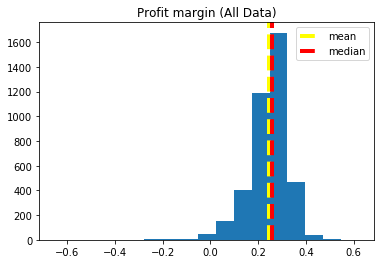

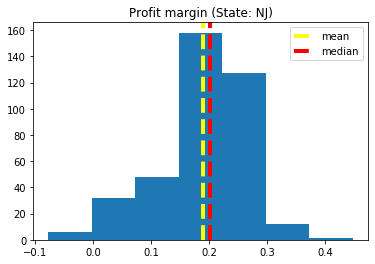

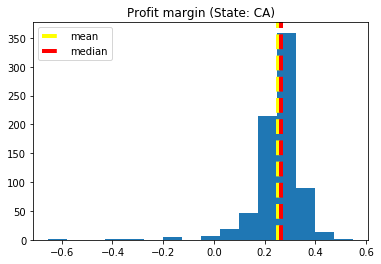

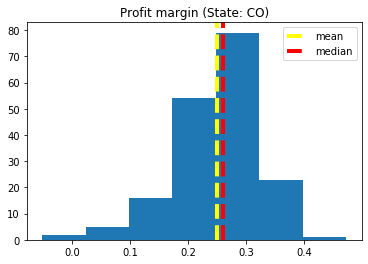

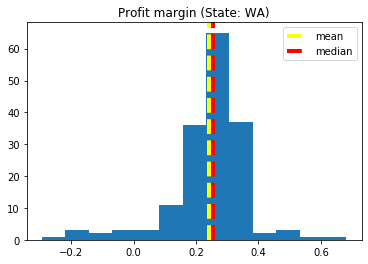

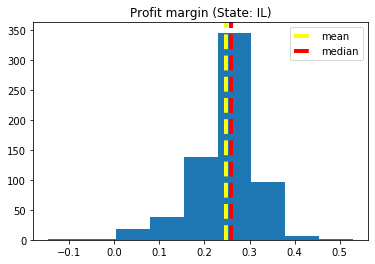

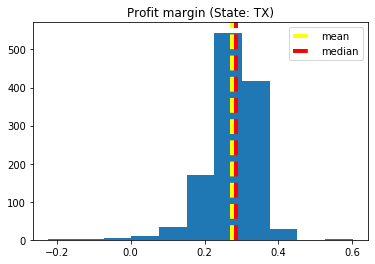

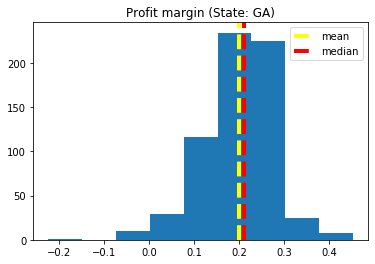

'\nfor location in uniqueLocations:\n    locationData = data[data["Location number"] == location]\n    plt.hist(locationData["Profit margin"].values, bins=np.arange(min(locationData["Profit margin"].values), max(locationData["Profit margin"].values) + binWidth, binWidth))\n    plt.axvline(locationMargin[location][0], color="yellow", label="mean", linestyle="dashed", linewidth=4)\n    plt.axvline(locationMargin[location][1], color="red", label="median", linestyle="dashed", linewidth=4)\n    plt.title("Profit margin (Location number: {})".format(location))\n    plt.legend()\n    plt.show()\n'

In [95]:
binWidth = 0.075
plt.hist(data["Profit margin"].values, bins=np.arange(min(data["Profit margin"].values), max(data["Profit margin"].values) + binWidth, binWidth))
plt.axvline(np.mean(data["Profit margin"].values), color="yellow", label="mean", linestyle="dashed", linewidth=4)
plt.axvline(np.median(data["Profit margin"].values), color="red", label="median", linestyle="dashed", linewidth=4)
plt.title("Profit margin (All Data)")
plt.legend()
plt.show()

for state in uniqueStates:
    stateData = data[data.State == state]
    plt.hist(stateData["Profit margin"].values, bins=np.arange(min(stateData["Profit margin"].values), max(stateData["Profit margin"].values) + binWidth, binWidth))
    plt.axvline(stateMargin[state][0], color="yellow", label="mean", linestyle="dashed", linewidth=4)
    plt.axvline(stateMargin[state][1], color="red", label="median", linestyle="dashed", linewidth=4)
    plt.title("Profit margin (State: {})".format(state))
    plt.legend()
    plt.show()

# For individual location number graphs, uncomment below loop
'''
for location in uniqueLocations:
    locationData = data[data["Location number"] == location]
    plt.hist(locationData["Profit margin"].values, bins=np.arange(min(locationData["Profit margin"].values), max(locationData["Profit margin"].values) + binWidth, binWidth))
    plt.axvline(locationMargin[location][0], color="yellow", label="mean", linestyle="dashed", linewidth=4)
    plt.axvline(locationMargin[location][1], color="red", label="median", linestyle="dashed", linewidth=4)
    plt.title("Profit margin (Location number: {})".format(location))
    plt.legend()
    plt.show()
''' 
# Each of the graph groups, state-wise and location-wise, 
# look generally skewed-left

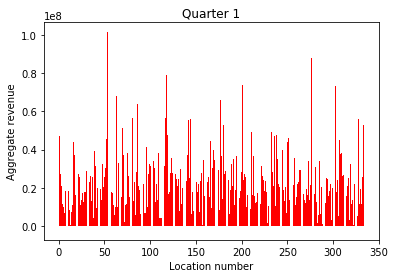

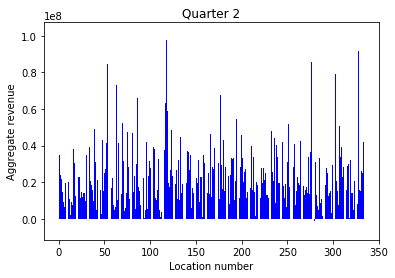

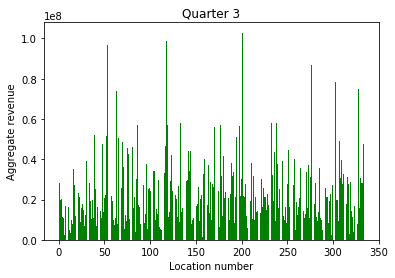

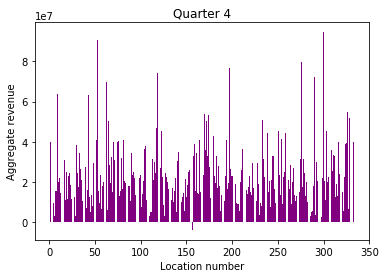

In [96]:
quarterlyAggregate = {location: [] for location in uniqueLocations}
quarterlySum = 0

loc = 1
for index, row in data.iterrows():
    if (index+1)%3 != 0:
        quarterlySum += data["Aggregate revenue"].values[index] 
    else:
        quarterlySum += data["Aggregate revenue"].values[index]
        quarterlyAggregate[loc].append(quarterlySum)
        quarterlySum = 0
        if (index+1)%12 == 0:
            loc += 1

q1List = []
q2List = []
q3List = []
q4List = []
for i in uniqueLocations:
    q1List.append(quarterlyAggregate[i][0])
    q2List.append(quarterlyAggregate[i][1])
    q3List.append(quarterlyAggregate[i][2])
    q4List.append(quarterlyAggregate[i][3])

plt.bar(uniqueLocations, q1List, color="red")
plt.xlabel("Location number")
plt.ylabel("Aggregate revenue")
plt.title("Quarter 1")
plt.show()

plt.bar(uniqueLocations, q2List, color="blue")
plt.xlabel("Location number")
plt.ylabel("Aggregate revenue")
plt.title("Quarter 2")
plt.show()

plt.bar(uniqueLocations, q3List, color="green")
plt.xlabel("Location number")
plt.ylabel("Aggregate revenue")
plt.title("Quarter 3")
plt.show()

plt.bar(uniqueLocations, q4List, color="purple")
plt.xlabel("Location number")
plt.ylabel("Aggregate revenue")
plt.title("Quarter 4")
plt.show()

In [118]:
avgStateRental = {state: 0 for state in uniqueStates}
for state in uniqueStates:
    zeroIndex = []
    counter = 0
    rentalData = data["Rental cost"][data.State == state].values
    for i in rentalData:
        if i == 0:
            zeroIndex.append(counter)
        counter += 1
    np.delete(rentalData, zeroIndex)
    avgRental = np.mean(rentalData)
    avgStateRental[state] = avgRental
    
for index, row in data.iterrows():
    rent = data["Rental cost"].values[index]
    state = data["State"].values[index]
    if rent == 0:
        data.at[index, "Rental cost"] = avgStateRental[state]
        
display(data.head(48))

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Quarter,Profit margin,Aggregate revenue
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False,1,0.303650,14765945.10
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False,1,0.250206,12036707.48
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False,1,0.312173,20089024.69
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False,2,0.278078,12775913.49
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False,2,0.242398,7941319.37
5,1,6,TX,50677036.26,9763597.30,26233794.37,365880,4452,False,2,0.282451,14313764.59
6,1,7,TX,28215465.22,8245679.54,14457234.12,365880,4452,False,3,0.182406,5146671.56
7,1,8,TX,38955413.84,7863853.69,19744464.29,365880,4452,False,3,0.281892,10981215.86
8,1,9,TX,43602895.19,9067861.36,22138203.51,365880,4452,False,3,0.275921,12030950.32
9,1,10,TX,52406102.98,9062239.73,26246199.30,365880,4452,False,4,0.319272,16731783.95
